# Практическая работа 3

#### ЗАДАНИЕ



1. Провести статистическую обработку текста.

2. Определить энтропию, приходящуюся в среднем на одну букву, длину кода при 
равномерном кодировании и избыточность.

3. Построить схему алфавитного кодирования для однобуквенных сочетаний методом 
Хаффмана.  Найти среднюю длину элементарного кода, эффективность сжатия.

4. Закодировать текст. Декодировать текст.

5. Построить схему алфавитного кодирования для двухбуквенных сочетаний методом 
Хаффмана. Найти среднюю длину элементарного кода, эффективность сжатия, 
сравнить с результатами для однобуквенных сочетаний. 
6. Закодировать текст. Декодировать текст. 


#### Отладочный код для метода хаффмана

In [ ]:
import heapq


def huffman(probs):
    heap = [(prob, [char]) for char, prob in probs.items()]
    heapq.heapify(heap)

    codes = {char: "" for char in probs}
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)

        for char in left[1]:
            codes[char] = "0" + codes[char]
        for char in right[1]:
            codes[char] = "1" + codes[char]

        heapq.heappush(heap, (left[0] + right[0], left[1] + right[1]))

    return codes

probs = {'1': 2/14, '2': 3/14, '3': 5/14, '4': 2/14, '5': 2/14}
codes = huffman(probs)

print("Коды Хаффмана:", codes)

Коды Хаффмана: {'1': '100', '2': '111', '3': '0', '4': '101', '5': '110'}


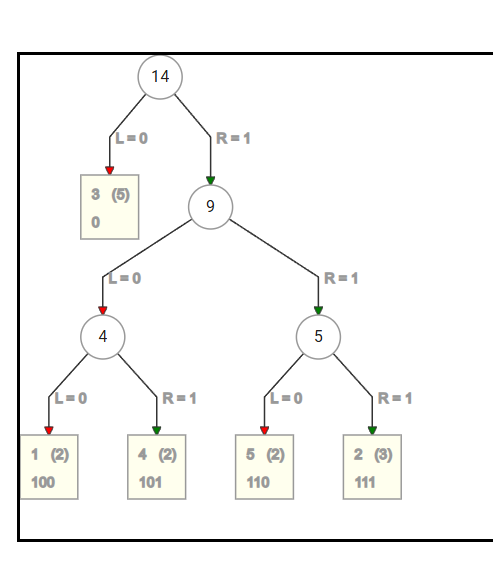

#### Собственно задание

In [59]:
import string;
from collections import Counter;
import math;

######################
file_path = "text.txt"
######################

with open(file_path, 'r', encoding='UTF-8') as file:
    text = file.read()
    cleanText = text.lower().translate(str.maketrans('','', string.punctuation)).replace(' ', '')
    charCounter = Counter(cleanText)

    ########################################

    binGram_counts = {}
    for i in range(len(cleanText) -1):
        bingram = cleanText[i:i+2];
        if bingram in binGram_counts:
            binGram_counts[bingram] +=1;
        else:
            binGram_counts[bingram] = 1;
    ########################################
    totalChars = sum(charCounter.values())

    charProbs = {char : count / totalChars for char, count in charCounter.items()}

    entropy = -sum( p * math.log2(p) for p in charProbs.values())
    ########################################

    totalBinGrams = sum(binGram_counts.values())

    binGramProbs = {binGram : count / totalBinGrams for binGram, count in binGram_counts.items()}

    binGramEntropy = -sum( p * math.log2(p) for p in binGramProbs.values())
    #########################################
    # Для однобуквенных символов и бинграм при равноменном кодировании формула Длины кода : l = |log2(m).

    lengChars = math.ceil(math.log2(len(charProbs)))

    lengBin = math.ceil(math.log2(len(binGramProbs)))
    ########################################

    
    #D0 = 1 - H/l

    #Dp = 1 - H / log2(m)

    D0_chars = 1 - entropy / lengChars

    Dp_chars = 1 - entropy / math.log2(len(charProbs)) 


    D0_bingrams = 1 - binGramEntropy / lengBin

    Dp_bingrams = 1 - binGramEntropy / math.log2(len(binGramProbs))

    ########################################

    def huffman(probs):
        heap = [(prob, [char]) for char, prob in probs.items()]
        heapq.heapify(heap)

        codes = {char: "" for char in probs}
        while len(heap) > 1:
            left = heapq.heappop(heap)
            right = heapq.heappop(heap)

            for char in left[1]:
                codes[char] = "1" + codes[char]
            for char in right[1]:
                codes[char] = "0" + codes[char]

            heapq.heappush(heap, (left[0] + right[0], left[1] + right[1]))

        return codes
# Кодирование однобуквенных сочетаний
codes = huffman(charProbs)
print(codes)
avg_Len = sum(len(codes[char]) * prob for char, prob in charProbs.items())
char_coding_efficiency = entropy / avg_Len

# Кодирование текста
encoded_text_chars = "".join(codes[char] for char in cleanText)
# Декодирование текста
# Создаем обратный словарь для декодирования
reverse_codes = {v: k for k, v in codes.items()} 

# Простое декодирование с использованием обратного словаря
decoded_text_chars = ""
current_code = ""
for bit in encoded_text_chars: # Проходим по всем битам закодированного текста
    current_code += bit     # Добавляем текущий бит к текущему коду
    if current_code in reverse_codes: # Если текущий код есть в обратном словаре
        decoded_text_chars += reverse_codes[current_code] # Добавляем соответствующий символ в декодированный текст
        current_code = "" # Обнуляем текущий код 

# Кодирование двухбуквенных сочетаний
codes = huffman(binGramProbs)
avg_Len_bin = sum(len(codes[binGram]) * prob for binGram, prob in binGramProbs.items())
char_coding_efficiency_bin = binGramEntropy / avg_Len
# Кодирование текста двухбуквенными сочетаниями
encoded_text_chars_bingram = "".join(codes[binGram] for binGram in binGram_counts.keys())
# Декодирование текста
# Создаем обратный словарь для декодирования
reverse_codes = {v: k for k, v in codes.items()}
decoded_text_chars_bingram = ""
current_code = ""
for bit in encoded_text_chars_bingram: # Проходим по всем битам закодированного текста
    current_code += bit     # Добавляем текущий бит к текущему коду
    if current_code in reverse_codes: # Если текущий код есть в обратном словаре
        decoded_text_chars_bingram += reverse_codes[current_code] # Добавляем соответствующий символ в декодированный текст
        current_code = "" # Обнуляем текущий код



print(f"Средняя длина кода: {avg_Len}")
print(f"Эффективность кодирования: {char_coding_efficiency}")
print(f"Длина исходного текста: {len(cleanText)}")
print(f"Длина закодированного текста: {len(encoded_text_chars)}")
print(f"Исходный текст: {cleanText}")
print(f"Закодированный текст: {encoded_text_chars}")
print(f"Декодированный текст: {decoded_text_chars}\n")

print(codes)
print(f"средняя длина кода для биграмм: {avg_Len_bin}")
print(f"Эффективность кодирования для биграмм: {char_coding_efficiency_bin}")
print(f"Длина исходного текста: {len(cleanText)}")
print(f"Длина закодированного текста: {len(encoded_text_chars_bingram)}")
print(f"Закодированный текст: {encoded_text_chars_bingram}")
print(f"Декодированный текст: {decoded_text_chars_bingram}")



{'1': '011', '2': '000', '3': '1', '4': '010', '5': '001'}
Средняя длина кода: 2.2857142857142856
Эффективность кодирования: 0.9668262791314429
Длина исходного текста: 14
Длина закодированного текста: 32
Исходный текст: 12342334551233
Закодированный текст: 01100010100001101000100101100011
Декодированный текст: 12342334551233

{'12': '011', '23': '10', '34': '001', '42': '0001', '33': '010', '45': '0000', '55': '110', '51': '111'}
средняя длина кода для биграмм: 2.9230769230769234
Эффективность кодирования для биграмм: 1.2569990472869959
Длина исходного текста: 14
Длина закодированного текста: 25
Закодированный текст: 0111000100010100000110111
Декодированный текст: 1223344233455551
